## CASA0013: Introduction to Programming for Spatial Analysts (20/21)
## Is Airbnb driving property prices in London?
#### Student Number:16040746
##### Word Count for the Executive Briefing: 1740

# Reproducible Analysis

In [1]:
import pandas as pd
import os

#start importing and cleasning data
# We only need the land size of each borough in this file, so 'cols' the relevant column out and sort by area name.

df_Hectares = pd.read_csv('https://data.london.gov.uk/download/london-borough-profiles/c1693b82-68b1-44ee-beb2-3decf17dc1f8/london-borough-profiles.csv',
                         encoding='unicode_escape', usecols=['Area_name','Inland_Area_(Hectares)'])
# data accessed via London Datastore <https://data.london.gov.uk/dataset/london-borough-profiles>

# check data
df_Hectares.head()

,Area_name,Inland_Area_(Hectares)
0,City of London,290
1,Barking and Dagenham,"3,611"
2,Barnet,"8,675"
3,Bexley,"6,058"
4,Brent,"4,323"


In [2]:
df_Airbnb = pd.read_csv('http://data.insideairbnb.com/united-kingdom/england/london/2019-01-13/data/listings.csv.gz', 
                        encoding='unicode_escape',compression='gzip', low_memory=False)
# data accessed via Inside airbnb <http://insideairbnb.com>
                        
df_Airbnb.head()
# check there's no nulls exist in our datafile

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,28442644,https://www.airbnb.com/rooms/28442644,20190113153704,2019-01-14,Luxury 2BR Apt Oxford Circus,A brand new light 4 floor (with lift) 2 bedroo...,NaN,A brand new light 4 floor (with lift) 2 bedroo...,none,NaN,...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,1.00
1,4902560,https://www.airbnb.com/rooms/4902560,20190113153704,2019-01-14,Amazing location 1-bedroom Piccadilly apartment,Enjoy the hustle and bustle of the very centre...,The first thing to note is that itâs brand n...,Enjoy the hustle and bustle of the very centre...,none,"Located in Soho, moments away from Piccadilly ...",...,t,f,moderate,f,f,5,5,0,0,2.04
2,14082599,https://www.airbnb.com/rooms/14082599,20190113153704,2019-01-14,"2 Bedroom Flat in Bayswater, Hyde Park, London...",This two bedroom flat is located in a well mai...,This newly renovated apartment is located on t...,This two bedroom flat is located in a well mai...,none,"Great neighborhood with plenty of restaurants,...",...,f,f,strict_14_with_grace_period,f,f,90,81,9,0,1.70
3,775489,https://www.airbnb.com/rooms/775489,20190113153704,2019-01-14,Central Covent Garden balcony flat,Our modern comfortable apartment is about 800s...,(There's a second bedroom but it is used to st...,Our modern comfortable apartment is about 800s...,none,NaN,...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,0.16
4,5587732,https://www.airbnb.com/rooms/5587732,20190113153704,2019-01-14,2Bedroom Londoner City Marque Flat,Offering self-catering accommodation in London...,The apartment features two bedrooms (one doubl...,Offering self-catering accommodation in London...,none,The neighborhood around Warren Street is lovel...,...,f,f,moderate,f,f,10,10,0,0,0.64


In [3]:
#set a new dataframe with information we need, longtitude and latitude is for mapping later.
df_Airbnb1 = df_Airbnb[['id', 'neighbourhood_cleansed', 'latitude', 'longitude']]
df_Airbnb1.head()

,id,neighbourhood_cleansed,latitude,longitude
0,28442644,Westminster,51.517656,-0.140243
1,4902560,Westminster,51.511037,-0.134592
2,14082599,Westminster,51.514036,-0.185138
3,775489,Westminster,51.511216,-0.123900
4,5587732,Camden,51.521989,-0.138291


In [4]:
# this data set is for london privte leasing price
df_price1 = pd.read_csv('https://raw.githubusercontent.com/wensylvia/i2p-final/main/voa-average-rent-borough-2.csv',
                       skiprows = lambda x: x in [0]
                         )
# data accessed via London Datastore <https://data.london.gov.uk/dataset/average-private-rents-borough>

df_price1.head()

,Area Code,Area,Count of rents,Average (£),Lower quartile (£),Median (£),Upper quartile (£),Count of rents.1,Average (£).1,Lower quartile (£).1,...,Count of rents.18,Average (£).18,Lower quartile (£).18,Median (£).18,Upper quartile (£).18,Count of rents.19,Average (£).19,Lower quartile (£).19,Median (£).19,Upper quartile (£).19
0,E09000001,City of London,109,"1,713","1,365","1,647","1,950",106,"1,720","1,365",...,70,"2,189","1,712","2,117","2,383",100,"2,377","1,744","2,210","2,600"
1,E09000002,Barking and Dagenham,894,792,675,800,950,767,800,675,...,740,"1,193","1,018","1,200","1,350",810,"1,192","1,000","1,200","1,350"
2,E09000003,Barnet,"4,054","1,202",650,"1,000","1,407","3,798","1,258",737,...,"2,380","1,535","1,200","1,376","1,700","2,810","1,548","1,175","1,365","1,700"
3,E09000004,Bexley,"1,042",795,650,775,950,910,807,650,...,690,"1,026",850,"1,000","1,225",820,"1,084",875,"1,100","1,275"
4,E09000005,Brent,"1,989","1,218",750,"1,105","1,500","1,779","1,242",750,...,"2,260","1,582","1,250","1,495","1,800","2,010","1,578","1,250","1,500","1,800"


In [5]:
# Grab the relevant year's(2019) data out for analysis in this report
df_price1 = df_price1[['Area', 'Average (£).19']]
df_price1.columns = ['neighbourhood', 'average rental price']
df_price1.head()

,neighbourhood,average rental price
0,City of London,"2,377"
1,Barking and Dagenham,"1,192"
2,Barnet,"1,548"
3,Bexley,"1,084"
4,Brent,"1,578"


In [7]:
#Remove nulls
df_price = df_price1.dropna()

In [8]:
import locale
from locale import atof

# For more precise calculations, apply numeric.
locale.setlocale(locale.LC_NUMERIC, '')
df_price['average rental price'] = df_price['average rental price'].apply(lambda x: float(''.join(x.split(',')))) 

In [9]:
df_price.head()

,neighbourhood,average rental price
0,City of London,2377.0
1,Barking and Dagenham,1192.0
2,Barnet,1548.0
3,Bexley,1084.0
4,Brent,1578.0


In [10]:
df_Hectares = df_Hectares[:-1]
df_Hectares['Inland_Area_(Hectares)'] = df_Hectares['Inland_Area_(Hectares)'].apply(lambda x: float(''.join(x.split(','))))
df_Hectares.head()

,Area_name,Inland_Area_(Hectares)
0,City of London,290.0
1,Barking and Dagenham,3611.0
2,Barnet,8675.0
3,Bexley,6058.0
4,Brent,4323.0


In [11]:
df_Hectares.columns = ['neighbourhood_cleansed', 'Inland_Area_(Hectares)']

In [12]:
df_price['neighbourhood_cleansed'] = df_price['neighbourhood'].apply(lambda x: x.replace('&', 'and'))
df_price

,neighbourhood,average rental price,neighbourhood_cleansed
0,City of London,2377.0,City of London
1,Barking and Dagenham,1192.0,Barking and Dagenham
2,Barnet,1548.0,Barnet
3,Bexley,1084.0,Bexley
4,Brent,1578.0,Brent
5,Bromley,1318.0,Bromley
6,Camden,2427.0,Camden
7,Croydon,1112.0,Croydon
8,Ealing,1484.0,Ealing
9,Enfield,1325.0,Enfield


In [13]:
# merge data sets
df_price_area = pd.merge(df_price[['average rental price', 'neighbourhood_cleansed']], df_Hectares, on='neighbourhood_cleansed', how='inner')
df_price_area

,average rental price,neighbourhood_cleansed,Inland_Area_(Hectares)
0,2377.0,City of London,290.0
1,1192.0,Barking and Dagenham,3611.0
2,1548.0,Barnet,8675.0
3,1084.0,Bexley,6058.0
4,1578.0,Brent,4323.0
5,1318.0,Bromley,15013.0
6,2427.0,Camden,2179.0
7,1112.0,Croydon,8650.0
8,1484.0,Ealing,5554.0
9,1325.0,Enfield,8083.0


In [14]:
# get the toal number of listing properties on airbnb 
df_Airbnb1.groupby('neighbourhood_cleansed')['id'].count()

neighbourhood_cleansed
Barking and Dagenham       261
Barnet                    1400
Bexley                     217
Brent                     2298
Bromley                    583
Camden                    5476
City of London             434
Croydon                    969
Ealing                    1563
Enfield                    565
Greenwich                 1525
Hackney                   5912
Hammersmith and Fulham    3927
Haringey                  2054
Harrow                     433
Havering                   216
Hillingdon                 537
Hounslow                   949
Islington                 4747
Kensington and Chelsea    5483
Kingston upon Thames       460
Lambeth                   4574
Lewisham                  2101
Merton                    1247
Newham                    1807
Redbridge                  630
Richmond upon Thames      1136
Southwark                 4620
Sutton                     240
Tower Hamlets             7552
Waltham Forest            1269
Wandsworth      

In [15]:
# group all cleasned data together
s = df_Airbnb1.groupby('neighbourhood_cleansed')['id'].count()
df_price_area.set_index('neighbourhood_cleansed', inplace=True)
df_price_area['listings'] = s
df_price_area

,average rental price,Inland_Area_(Hectares),listings
neighbourhood_cleansed,,,
City of London,2377.0,290.0,434
Barking and Dagenham,1192.0,3611.0,261
Barnet,1548.0,8675.0,1400
Bexley,1084.0,6058.0,217
Brent,1578.0,4323.0,2298
Bromley,1318.0,15013.0,583
Camden,2427.0,2179.0,5476
Croydon,1112.0,8650.0,969
Ealing,1484.0,5554.0,1563


In [16]:
# let's check our cleansed dataset
df_price_area['listings'].describe()

count      33.000000
mean     2347.242424
std      2290.408179
min       216.000000
25%       565.000000
50%      1400.000000
75%      3929.000000
max      8345.000000
Name: listings, dtype: float64

In [17]:
# Setup dataframe for airbnb density
df_price_area['density'] = df_price_area['listings'] / df_price_area['Inland_Area_(Hectares)']
df_price_area

,average rental price,Inland_Area_(Hectares),listings,density
neighbourhood_cleansed,,,,
City of London,2377.0,290.0,434,1.496552
Barking and Dagenham,1192.0,3611.0,261,0.072279
Barnet,1548.0,8675.0,1400,0.161383
Bexley,1084.0,6058.0,217,0.035820
Brent,1578.0,4323.0,2298,0.531575
Bromley,1318.0,15013.0,583,0.038833
Camden,2427.0,2179.0,5476,2.513079
Croydon,1112.0,8650.0,969,0.112023
Ealing,1484.0,5554.0,1563,0.281419


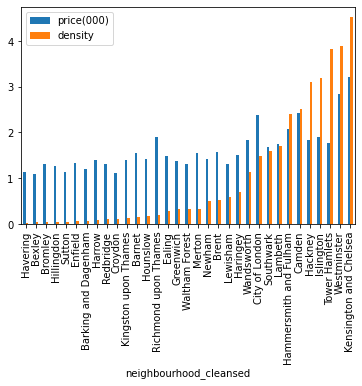

In [18]:
# For chart analysis 
import matplotlib.pyplot as plt

df_price_area = df_price_area.sort_values(by='density')
df_price_area['price(000)'] = df_price_area['average rental price'] / 1000 #In order to compare the data on the chart more visually, we divide the rental price by one thousand.

ax = df_price_area[['price(000)', 'density']].plot.bar(rot=0)
plt.xticks(rotation=90)
plt.show()

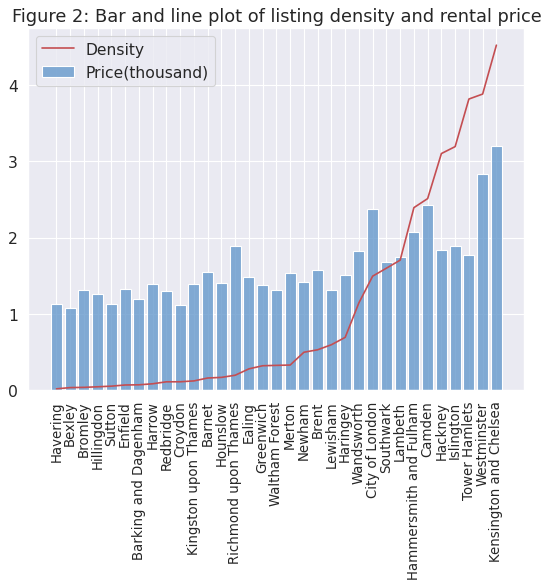

In [23]:
# Display data in another way
from matplotlib.pyplot import figure

figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.bar(df_price_area.index, df_price_area['price(000)'], label='Price(thousand)',color=(0.4, 0.6, 0.8, 0.8))
plt.plot(df_price_area.index, df_price_area['density'], c='r', label='Density')
plt.grid(b=True, which='major', linestyle='-')
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=14)
plt.legend(loc=2, prop={'size': 14})
plt.title('Figure 2: Bar and line plot of listing density and rental price', fontdict={'fontsize':16})
plt.show()

In [20]:
# Pearson Correlation
X1=df_price_area['price(000)']
Y1=df_price_area['density']

X1.mean() 
Y1.mean() 
X1.var() 
Y1.var() 
  
X1.std() 
Y1.std() 
X1.cov(Y1) 

X1.corr(Y1,method="pearson") 
X1.cov(Y1)/(X1.std()*Y1.std())

0.8349428336282745

Text(1.0, -0.01, 'Figure 3: Correlation testing analysis')

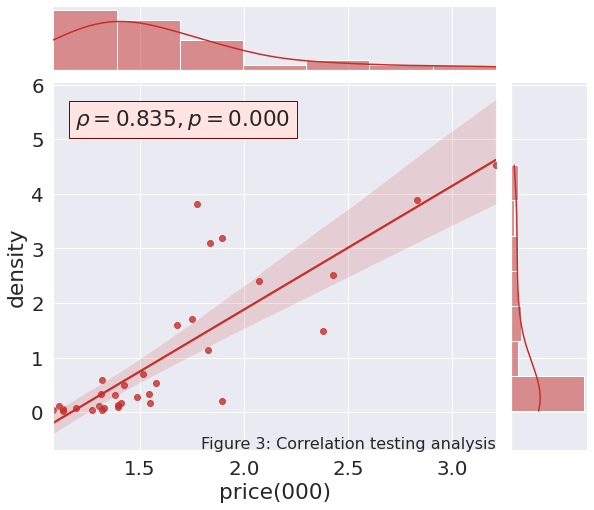

In [22]:
import seaborn as sns
import scipy.stats as stats
# plotting info on chart with correlation(P-value) 


for i in list('reg'.split(',')):
    sns.set(style="darkgrid",font_scale=1.8)
    g = sns.jointplot(x='price(000)', y="density", data=df_price_area,
                      color='#c72e29',
                      kind='reg'
                     )
    g.fig.set_size_inches(10,8)

a = df_price_area['price(000)']
b = df_price_area['density']
r, p = stats.pearsonr(a, b)
g.ax_joint.annotate(f'$\\rho = {r:.3f}, p = {p:.3f}$',
                    xy=(0.05, 0.9), xycoords='axes fraction',
                    ha='left', va='center',
                    bbox={'fc': 'mistyrose', 'ec': 'maroon','boxstyle': 'square'},
                   )
plt.title('Figure 3: Correlation testing analysis', fontdict={'fontsize':16}, loc='right',y=-0.01)

<AxesSubplot:>

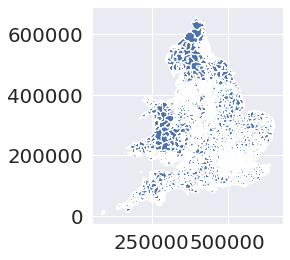

In [25]:
import geopandas as gpd
# Start mapping
msoa = gpd.read_file('https://opendata.arcgis.com/datasets/5d4e4cc075ef4a40acbe6e50735451ef_0.zip?outSR=%7B%22latestWkid%22%3A27700%2C%22wkid%22%3A27700%7D')

boroughs = gpd.read_file('https://github.com/wensylvia/i2p-final/raw/main/Boroughs.gpkg')

# data accessed via ONS <https://geoportal.statistics.gov.uk/datasets/middle-layer-super-output-areas-december-2011-ew-bgc-v2>

msoa.plot()

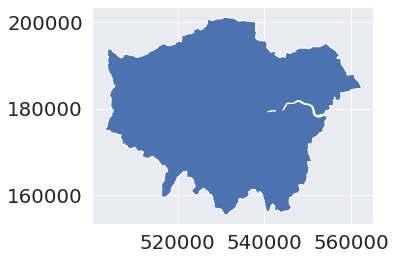

In [26]:
ldn = gpd.GeoDataFrame(gpd.GeoSeries(data=boroughs.unary_union, crs='epsg:27700')).rename(columns={0:'original'})

ldn['geometry'] = ldn.original.buffer(250)
ldn = ldn.set_geometry('geometry')
ldn.plot();

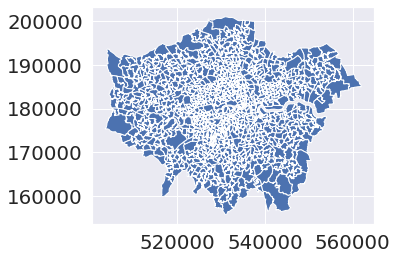

In [27]:
ldn_msoa = gpd.sjoin(msoa, ldn, op='within')
ldn_msoa.plot();

In [28]:
del(msoa)
ldn_msoa.head(10)

,OBJECTID,MSOA11CD,MSOA11NM,MSOA11NMW,BNG_E,BNG_N,LONG,LAT,Shape__Are,Shape__Len,geometry,index_right,original
0,1,E02000001,City of London 001,City of London 001,532384,181355,-0.093490,51.51561,2.906361e+06,8936.818478,"POLYGON ((532135.138 182198.131, 532158.250 18...",0,"POLYGON ((535009.200 159504.700, 535005.500 15..."
1,2,E02000002,Barking and Dagenham 001,Barking and Dagenham 001,548267,189685,0.138756,51.58652,2.166163e+06,8150.405928,"POLYGON ((548881.563 190845.265, 548881.125 19...",0,"POLYGON ((535009.200 159504.700, 535005.500 15..."
2,3,E02000003,Barking and Dagenham 002,Barking and Dagenham 002,548259,188520,0.138149,51.57605,2.143568e+06,9118.196243,"POLYGON ((549102.438 189324.625, 548954.517 18...",0,"POLYGON ((535009.200 159504.700, 535005.500 15..."
3,4,E02000004,Barking and Dagenham 003,Barking and Dagenham 003,551004,186412,0.176828,51.55638,2.491467e+06,8206.551627,"POLYGON ((551550.056 187364.705, 551478.000 18...",0,"POLYGON ((535009.200 159504.700, 535005.500 15..."
4,5,E02000005,Barking and Dagenham 004,Barking and Dagenham 004,548733,186824,0.144267,51.56069,1.186053e+06,6949.688798,"POLYGON ((549099.634 187656.076, 549161.375 18...",0,"POLYGON ((535009.200 159504.700, 535005.500 15..."
5,6,E02000007,Barking and Dagenham 006,Barking and Dagenham 006,549698,186609,0.158087,51.55850,1.733891e+06,6773.520925,"POLYGON ((549819.924 187080.699, 549950.750 18...",0,"POLYGON ((535009.200 159504.700, 535005.500 15..."
6,7,E02000008,Barking and Dagenham 007,Barking and Dagenham 007,548218,185920,0.136463,51.55270,1.419514e+06,8420.282802,"POLYGON ((548171.431 186545.742, 548136.262 18...",0,"POLYGON ((535009.200 159504.700, 535005.500 15..."
7,8,E02000009,Barking and Dagenham 008,Barking and Dagenham 008,546785,185796,0.115757,51.55196,9.664481e+05,5990.476996,"POLYGON ((546867.625 186346.858, 546805.432 18...",0,"POLYGON ((535009.200 159504.700, 535005.500 15..."
8,9,E02000010,Barking and Dagenham 009,Barking and Dagenham 009,548913,185265,0.146203,51.54663,1.118599e+06,7655.182050,"POLYGON ((549618.850 185517.065, 549637.021 18...",0,"POLYGON ((535009.200 159504.700, 535005.500 15..."
9,10,E02000011,Barking and Dagenham 010,Barking and Dagenham 010,550613,185186,0.170668,51.54547,1.602091e+06,7771.181607,"POLYGON ((550244.018 185993.951, 550272.848 18...",0,"POLYGON ((535009.200 159504.700, 535005.500 15..."


In [29]:
# Confirm the range of msoa we want in order to merge and insert data on map later

msoa_names = pd.read_csv('https://raw.githubusercontent.com/wensylvia/i2p-final/main/MSOA-Names-1.10.csv')
#data accessed via <https://visual.parliament.uk/msoanames>
#Due to the high frequency of website update data, to ensure the reproducibility of the code, so i download it to my github.
msoa_names.head()

,msoa11cd,msoa11nm,msoa11nmw,msoa11hclnm,msoa11hclnmw,Laname
0,E02006534,Adur 001,Adur 001,Hillside,NaN,Adur
1,E02006535,Adur 002,Adur 002,Buckingham,NaN,Adur
2,E02006536,Adur 003,Adur 003,North Lancing,NaN,Adur
3,E02006537,Adur 004,Adur 004,Kingston & Southwick,NaN,Adur
4,E02006538,Adur 005,Adur 005,Shoreham Central & Beach,NaN,Adur


In [30]:
boroughs.head()
# Yes, the area range of this data set is consistent with the area of our cleansed data above

,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,geometry
0,Kingston upon Thames,E09000021,3726.117,0.000,F,"MULTIPOLYGON (((516401.600 160201.800, 516407...."
1,Croydon,E09000008,8649.441,0.000,F,"MULTIPOLYGON (((535009.200 159504.700, 535005...."
2,Bromley,E09000006,15013.487,0.000,F,"MULTIPOLYGON (((540373.600 157530.400, 540361...."
3,Hounslow,E09000018,5658.541,60.755,F,"MULTIPOLYGON (((521975.800 178100.000, 521967...."
4,Ealing,E09000009,5554.428,0.000,F,"MULTIPOLYGON (((510253.500 182881.600, 510249...."


In [31]:
# Merge data
df_price_area_geo = pd.merge(df_price_area, boroughs, left_index=True, right_on='NAME')
df_price_area_geo.head()

,average rental price,Inland_Area_(Hectares),listings,density,price(000),NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,geometry
5,1131.0,11235.0,216,0.019226,1.131,Havering,E09000016,11445.735,210.763,F,"MULTIPOLYGON (((549893.900 181459.800, 549894...."
14,1084.0,6058.0,217,0.035820,1.084,Bexley,E09000004,6428.649,370.619,F,"MULTIPOLYGON (((547226.200 181299.300, 547320...."
2,1318.0,15013.0,583,0.038833,1.318,Bromley,E09000006,15013.487,0.000,F,"MULTIPOLYGON (((540373.600 157530.400, 540361...."
6,1268.0,11570.0,537,0.046413,1.268,Hillingdon,E09000017,11570.063,0.000,F,"MULTIPOLYGON (((510599.800 191689.500, 510615...."
18,1130.0,4385.0,240,0.054732,1.130,Sutton,E09000029,4384.698,0.000,F,"MULTIPOLYGON (((528552.300 159658.100, 528399...."


/opt/conda/envs/sds2020/lib/python3.7/site-packages/geopandas/plotting.py:561: FutureWarning: 'colormap' is deprecated, please use 'cmap' instead (for consistency with matplotlib)
  FutureWarning,


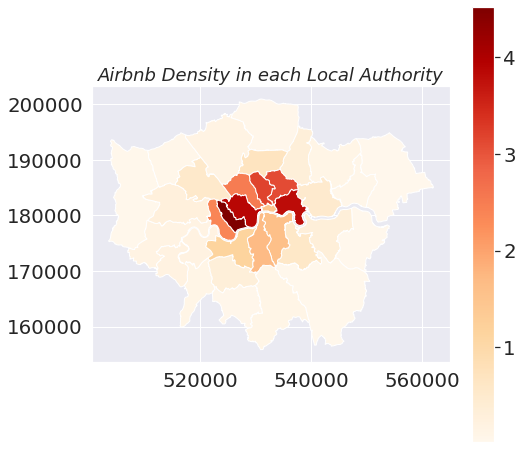

In [33]:
# Map shows Airbnb Density in Local Authority(London)
df_price_area_geo = df_price_area_geo.set_geometry('geometry')
df_price_area_geo.plot(column='density', colormap = 'OrRd', legend=True, figsize=(8,8));

plt.title('Airbnb Density in each Local Authority', style='oblique', fontdict={'fontsize':18})
plt.show()

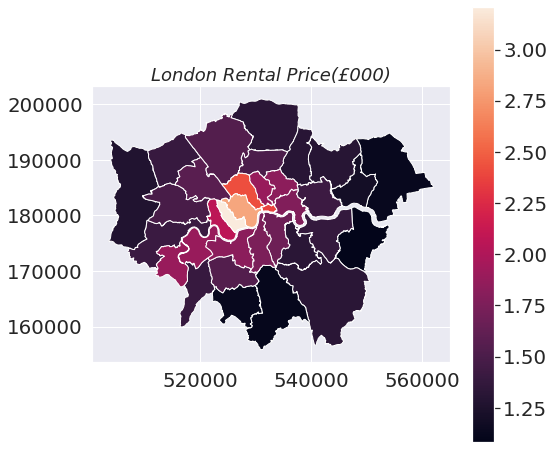

In [34]:
# Map shows London pricate leasing house price 

df_price_area_geo.plot(column='price(000)', legend=True, figsize=(8,8));

plt.title('London Rental Price(£000)', style='oblique', fontdict={'fontsize':18})
plt.show()

/opt/conda/envs/sds2020/lib/python3.7/site-packages/geopandas/plotting.py:561: FutureWarning: 'colormap' is deprecated, please use 'cmap' instead (for consistency with matplotlib)
  FutureWarning,


Text(0.5, 0.98, 'Figure 1: Maps for Airbnb listing density and rental prices in London')

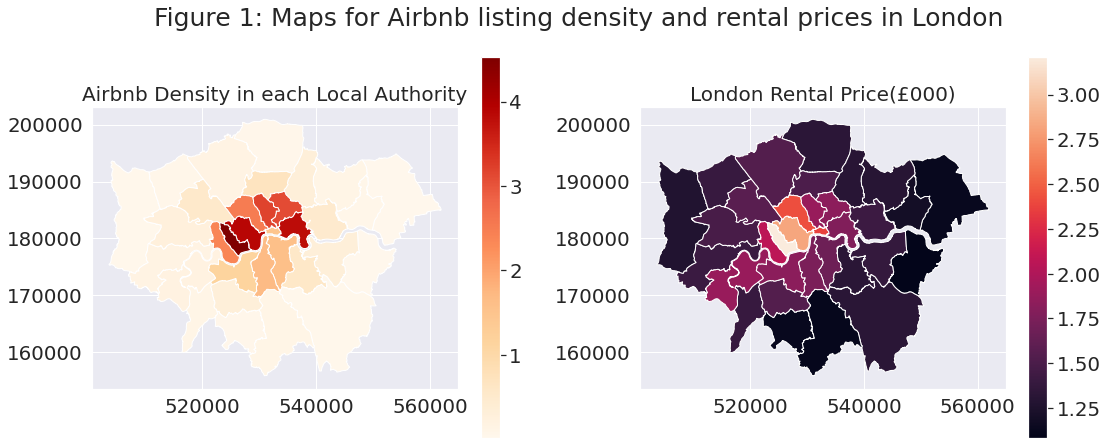

In [35]:
# Combine two maps in the same chunk as a comparison control group
# The purpose is to facilitate observation

f, axes = plt.subplots(1,2, figsize=(18,7))
df_price_area_geo.plot(ax=axes[0], column='density', colormap = 'OrRd', legend=True, figsize=(4,4));
df_price_area_geo.plot(ax=axes[1], column='price(000)', legend=True, figsize=(4,4));
axes[0].set_title('Airbnb Density in each Local Authority', fontsize=20)
axes[1].set_title('London Rental Price(£000)', fontsize=20)
plt.suptitle("Figure 1: Maps for Airbnb listing density and rental prices in London", fontsize=25)

## Executive Summary
#### To: Mayor of the Greater London Authority

The sharing economy has received significant research attention since the 2000s as platforms such as Airbnb expanded across the world. This is no doubt that digital sharing platforms has brought great benefits for consumers and landlords in the property market. However, researchers have proposed that side-effects such as rental price inflation in metropolitan cities such as London are being fuelled by commercial letting on Airbnb. High short-term rental returns are luring landlords to list their properties on sharing platforms which is restricting the supply of housing in London. This report conducted an empirical data investigation based on 2019 data and concludes that there is statistically significant evidence to suggest that Airbnb listing density (i.e., listings per square mile) is positively correlated with higher rental prices in the city of London. Numerous different attempts have been implemented to control the effect of Airbnb on property markets such as door-to-door inspections of rule violations to the establishment of city-wide property databases. However, this report suggests that there is limited evidence to suggest that such strategies are effective in mitigating against the rise of commercial short-term landlords and letting agencies. Instead, the Greater London Authority should seek to utilise algorithmic regulation based on data mining to flag properties which are potentially flaunting short-term letting regulations. This should be complemented by tougher enforcement against digital platforms such as Airbnb to ensure that regulations such as the 90-day rule is being enforced.

# Executive Briefing

   According to London City Hall projections, Greater London’s population will continue to increase from 8.2 million in 2011 to over 9.8 million by 2030. This forecasted increase in population is projected to place ever greater pressure on the capital’s housing markets with current rental prices being one of the highest in the world. The rise of the digital sharing economy as epitomised by Airbnb has played an important role in the tourism industry and has benefitted consumer groups such as landlords with spare accommodation capacity, holidaymakers, eventgoers and London’s booming tourism economy. On the other hand, platforms such as Airbnb have been accused of distorting local property markets owing to the rise of corporate and commercial landlords.
   
   Cocola-Grant & Gago (2019) remark that since the early 2010s, commercial landlord and letting agencies have emerged to exploit higher short-term rental returns on sharing platforms. Commercial short-term agencies provide sophisticated services such as multiple-platform listing and dynamic pricing strategies to maximise returns for buy-to-let landlords wishing to cash in on the thriving short-term rental market. In turn, this restricts the supply of houses in the market which leads to an increase in rental prices, further exacerbating the capital’s chronic housing shortage problem.
   
   Previous research reports have suggested that the original ethos of sharing economy platforms such has Airbnb has been undermined by the commercialisation of sharing (Guttentag, 2015). For example, The Residential Landlord’s Association conducted a research into the nature of Airbnb lettings in London and concluded that over 52% of listings were entire home/apartment rentals (Simcock & Smith, 2016). More worryingly, a significant 41% of listed properties were owned by multi-property owners which implies that commercial landlords and letting agencies are increasingly dominating the Airbnb platform. Therefore, there is empirical evidence to suggest that a sizeable proportion of Airbnb activity in London do not constitute to accommodation sharing. Ferreri & Sanyal (2018) noted that commercial letting activity is most prominent in central London boroughs such as Islington, Kensington & Chelsea, Camden and Westminster and postulates that Airbnb activity in these boroughs is responsible for the sharp surge in rental prices in recent years. As a result, young professionals are being priced out of central London boroughs.
   
   A research conducted by the Department of Communities and Local Governments reinforced this claim by revealing that Airbnb short-letting properties constitute 1.7% and 2.7% of total available dwellings in the central boroughs of Islington and Westminster respectively (Department for Communities and Local Government, 2016). The report also states that these figures are demonstrating an increasing trend. However, despite the numerous claims that Airbnb listings are distorting rental markets in London, there are relatively few studies which have attempted to analysis the statistical relationship between short-term letting and rental price trends in London. In Italy, there is statistical evidence to suggest that the growth of short-rental platforms like Airbnb have pushed up rental prices in cities such as Milan and Rome (Picascia et al., 2019). It is argued that the lure of short-term rent returns restricts housing supply in core city districts which in turn is driving up property prices for local residents. This research will aim to assess this relationship in the case of London by conducting a correlation analysis in Python.
   
   Airbnb Listing data for this research was collected from ‘Inside Airbnb’ January 2019 database. The sample size of London listings is n=77,471. This research applied listing density as opposed to analysing the nominal number of listings in each borough. This is because listing density takes into the account the size of each London borough which is an important factor to consider given that boroughs vary considerably in size. To illustrate, Westminster spans 8.29 square miles while Havering is over five times larger at 43.35 square miles. As such, using nominal figures listing figures would overlook an important control variable. Listing density is a more accurate measure of the prevalence of Airbnb properties in the capital and it is computed by dividing the number of live listings by borough size.
   
   Rental prices were collected from the Land Registry’s database for each of London’s 33 boroughs. This is an official and independent property price database which tracks rental price movements across the United Kingdom. Rental price data is collected for the corresponding month (i.e., Jan 2019). Statistical analysis was applied to assess the degree of correlation between Airbnb listing density and rental price in London’s 33 boroughs.

/opt/conda/envs/sds2020/lib/python3.7/site-packages/geopandas/plotting.py:561: FutureWarning: 'colormap' is deprecated, please use 'cmap' instead (for consistency with matplotlib)
  FutureWarning,


Text(0.5, 0.98, 'Figure 1: Maps for Airbnb listing density and rental prices in London')

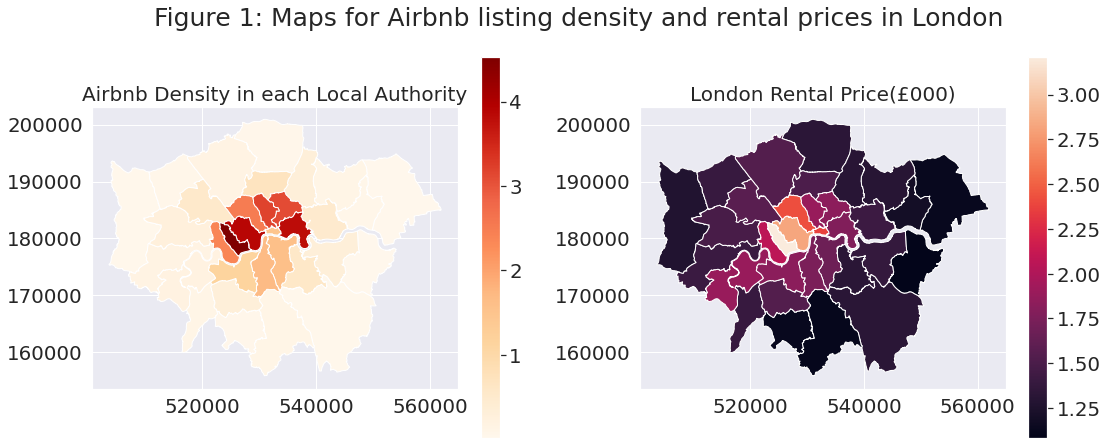

In [36]:
# Maps
f, axes = plt.subplots(1,2, figsize=(18,7))
df_price_area_geo.plot(ax=axes[0], column='density', colormap = 'OrRd', legend=True, figsize=(4,4));
df_price_area_geo.plot(ax=axes[1], column='price(000)', legend=True, figsize=(4,4));
axes[0].set_title('Airbnb Density in each Local Authority', fontsize=20)
axes[1].set_title('London Rental Price(£000)', fontsize=20)
plt.suptitle("Figure 1: Maps for Airbnb listing density and rental prices in London", fontsize=25)

Figure 1 depicts the spatial variation in Airbnb listing density in London and average rental prices of each London borough. From the map, it appears that there is a correlation between the density of Airbnb listings and rental prices. This relationship is also reinforced by the graphical plot. London broughs such as Kensington & Chelsea, Westminster and Islington exhibit the highest density of short-term rental listing and also the highest rental prices.

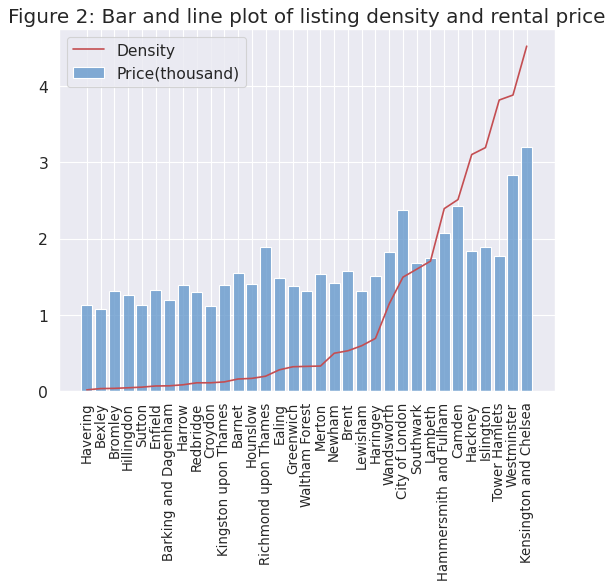

In [37]:
# Bar & Line chart
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.bar(df_price_area.index, df_price_area['price(000)'], label='Price(thousand)',color=(0.4, 0.6, 0.8, 0.8))
plt.plot(df_price_area.index, df_price_area['density'], c='r', label='Density')
plt.grid(b=True, which='major', linestyle='-')
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=14)
plt.legend(loc=2, prop={'size': 14})
plt.title('Figure 2: Bar and line plot of listing density and rental price', fontdict={'fontsize':18})
plt.show()

A correlation analysis was conducted in Python to assess whether the observed relationship is statistically significant. The output is depicted in figure 3 below. The correlation coefficient of 0.835 is statistically significant at the 95% significance level and this suggests that there is statistical backing of the above observed relationship. The positive correlation suggests that Airbnb listing density is positively correlated with higher rental prices in London. As such, the findings of the statistical analysis in this report imply that there is evidence to support the hypothesis which states that short-rental markets can cause rental prices to increase in London. These findings reinforce claims from researchers and landlord associations which propose that the rise of Airbnb is making central London boroughs to be increasingly unaffordable for young urban renters (Ferreri & Sanyal, 2018).

Text(1.0, -0.01, 'Figure 3: Correlation testing analysis')

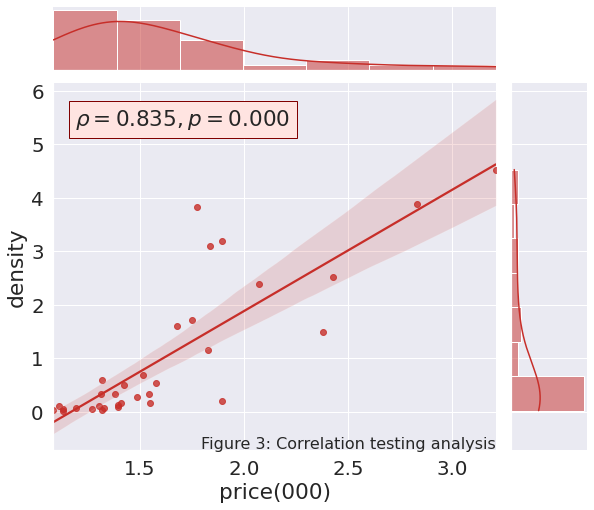

In [38]:
# Correlation testing
for i in list('reg'.split(',')):
    sns.set(style="darkgrid",font_scale=1.8)
    g = sns.jointplot(x='price(000)', y="density", data=df_price_area,
                      color='#c72e29',
                      kind='reg'
                     )
    g.fig.set_size_inches(10,8)

a = df_price_area['price(000)']
b = df_price_area['density']
r, p = stats.pearsonr(a, b)
g.ax_joint.annotate(f'$\\rho = {r:.3f}, p = {p:.3f}$',
                    xy=(0.05, 0.9), xycoords='axes fraction',
                    ha='left', va='center',
                    bbox={'fc': 'mistyrose', 'ec': 'maroon','boxstyle': 'square'},
                   )
plt.title('Figure 3: Correlation testing analysis', fontdict={'fontsize':16}, loc='right',y=-0.01)

Having established that a statistically significant positive correlation exists between Airbnb density and rental price movements across the 33 London boroughs, it is necessary to examine the history and nature of short-rental regulation in London before proposing solutions to the problem. The Deregulation Act of 2015 was introduced which legalised the short-term rental market in London. It states that landlords can utilise any residential premises for the purpose of providing temporary sleeping accommodation without having to apply to their local council for a change of use. However, the act restricts short-term rentals to an annual period of 90 days or less, this became commonly known as London’s “90-night rule” (Hunter et al., 2017). Nevertheless, there is evidence to suggest that landlords are continuing to openly flaunt this restriction with 2016 data suggesting that 63% of properties on the platform were available for over 90 days in an annual period (Simcock & Smith, 2016). Similarly, Airbnb data collected in this research shows that over half of entire property availability exceed this regulatory threshold. Therefore, it is intuitive that local authorities must place greater pressure on Airbnb to address such breaches. The fact that landlords continue to openly defy statutory regulation implies that enforcement remains insufficient. The Great London Authority must strengthen oversight of sharing platforms through strategies such as issuing fines for regulatory breaches. Without such incentives, it is unlikely that self-regulation will occur given that sharing platforms derive profit from every rental transaction.

Although self-regulation on the part of Airbnb is an important starting point, the problem does not end here. Research into the operations of corporate letting agencies highlight the use of techniques such as listing across multiple platforms, manipulation of property postal codes and property images to avoid detection of rule violations (Coyle & Yeung, 2016). For example, the usage of multiple listings combined with the manipulation of postal codes means that platforms are unable to detect the length of time that a particular property is listed. Since 2018, the borough of Westminster has established a team of enforcement officers who conduct door to door inspections of properties to detect potential violations of the Deregulation Act of 2015 (Holman et al., 2018). Although violations have been found and fined, this approach to compliance enforcement is largely inefficient given the difficulty in identifying infractions through such untargeted means (Inkson, 2019). Even when potential infractions are identified, the reliance on legal evidence obtained from physical inspections rarely leads to successful prosecution.

Another strategy is the establishment of a city-wide official registry where all short-term rental landlords must register and report to (Finck & Ranchordas, 2016). Such as approach has been trialled and implemented in Barcelona and Berlin but there is no empirical evidence to suggest that this expensive and prohibitive approach is effective in controlling commercial short-term letting. A recent empirical study highlighted that despite the statutory database, short-term rental platforms are still continuing to drive rental prices in central districts of Barcelona (Garcia-López et al., 2020). Moreover, the establishment of an official registry is considered as unnecessary red tape which deter genuine resource sharing. Therefore, a more cost-effective and targeted solution is needed.

This report recommends the usage of city-wide algorithmic regulation and data mining. Research has highlighted that data mining across different rental platforms can be successfully implemented to flag potential violations of rental rules (Stephany, 2015; Quattrone et al., 2016). Current computing technology can facilitate the algorithmic analysis of input factors such as rental images, reported postcodes, posted availability and review patterns to identify potential cases of regulatory violations. Developing such an algorithm can enable The Greater London Authority to engage in targeted investigation of rule infractions as opposed to Westminster’s haphazard door-to-door approach. Instead of random inspections, officers can be deployed to investigate properties which have been flagged as violating rental laws. Real-time data mining would also enable compliance departments to monitor changes to listings in real-time which facilitates longitudinal analysis of landlord behaviour over different time period (Kitchin, 2014). More importantly, the data obtained from algorithmic regulation can be later used in prosecution of violators during the legal process, thus overcoming the poor prosecution rates of current enforcement mechanisms.

However, it must be noted that such as approach would require the development and monitoring of data algorithms and thus initial costs are likely to be significant. Nevertheless, initial investment costs can be overcome if such a policy is developed on city or even national level. Once a function data mining algorithm has been established, it could be utilised by each individual council according to its needs. The centralised development approach would generate economies of scale and thus lower the average enforcement costs on a local level.

## References

Cocola-Gant, A., & Gago, A. (2019). Airbnb, buy-to-let investment and tourism-driven displacement: A case study in Lisbon. Environment and Planning A: Economy and Space, 0308518X19869012.

Coyle, D., & Yeung, T. (2016). Understanding Airbnb in fourteen European cities. The Jean-Jacques Laffont Digital Chair Working Papers, 7088, 1-33.

Department for Communities and Local Government (2016) Live Table 100. Dwelling Stock:
Number of Dwellings by Tenure and district: England. DCLG: London. Available at:
https://www.gov.uk/government/statistical-datasets/live-tables-on-dwelling-stock-includingvacants (accessed 29 December 2020).

Ferreri, M., & Sanyal, R. (2018). Platform economies and urban planning: Airbnb and regulated deregulation in London. Urban Studies, 55(15), 3353-3368.

Finck, M., & Ranchordás, S. (2016). Sharing and the City. Vand. J. Transnat'l L., 49, 1299.

Garcia-López, M. À., Jofre-Monseny, J., Martínez-Mazza, R., & Segú, M. (2020). Do short-term rental platforms affect housing markets? Evidence from Airbnb in Barcelona. Journal of Urban Economics, 119, 103278.

Guttentag, D. (2015). Airbnb: disruptive innovation and the rise of an informal tourism accommodation sector. Current issues in Tourism, 18(12), 1192-1217.

Holman N, Mossa A and Pani E (2018) Planning, value(s) and the market: An analytic for
‘What comes next?’’ Environment and Planning A, 50(3): 608–626.

Hunter, C. M., Brookes, A., & Peaker, G. (2017). Airbnb-Issues for Housing Lawyers. Journal of Housing Law, 39-46.

Inkson, C. (2019). Unplanned Expansions: Renting Private Homes to Tourists. DESTINATION LONDON, 37.

Kitchin R (2014) The real-time city? Big data and smart urbanism. GeoJournal 79(1): 1–14.

Picascia, S., Romano, A., & Teobaldi, M. (2019). The airification of cities. Making sense of the impact of peer to peer short term letting on urban functions and economy.

Quattrone, G., Proserpio, D., Quercia, D., Capra, L., & Musolesi, M. (2016, April). Who benefits from the" Sharing" economy of Airbnb?. In Proceedings of the 25th international conference on world wide web (pp. 1385-1394).

Simcock, T., & Smith, D. (2016). The bedroom boom: Airbnb and London.

Stephany, A. (2015). The business of sharing: Making it in the new sharing economy. Springer.


### Appendix

Full report and datasource are avaliable on my github: https://github.com/wensylvia/i2p-final

Contact: wei-chu.wen.20@ucl.ac.uk